### Importing the necessary libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px
import folium
from folium import plugins

plt.rcParams["figure.figsize"] = (6,4)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('customer_data.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,CustomerSince,NumPurchases,LoyaltyPoints
0,1.0,56.0,Male,NaN,18.0,2016-03-30,11.0,1471.0
1,2.0,69.0,Female,73565.0,12.0,2016-07-01,60.0,826.0
2,3.0,46.0,Female,70342.0,72.0,2021-10-11,65.0,1428.0
3,4.0,32.0,Female,57723.0,97.0,2016-09-27,76.0,2443.0
4,5.0,60.0,Male,50572.0,46.0,2023-07-20,4.0,4874.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     9500 non-null   float64
 1   Age            9500 non-null   float64
 2   Gender         9500 non-null   object 
 3   AnnualIncome   9500 non-null   float64
 4   SpendingScore  9500 non-null   float64
 5   CustomerSince  9500 non-null   object 
 6   NumPurchases   9500 non-null   float64
 7   LoyaltyPoints  9500 non-null   float64
dtypes: float64(6), object(2)
memory usage: 625.1+ KB


In [5]:
df.isnull().sum()

CustomerID       500
Age              500
Gender           500
AnnualIncome     500
SpendingScore    500
CustomerSince    500
NumPurchases     500
LoyaltyPoints    500
dtype: int64

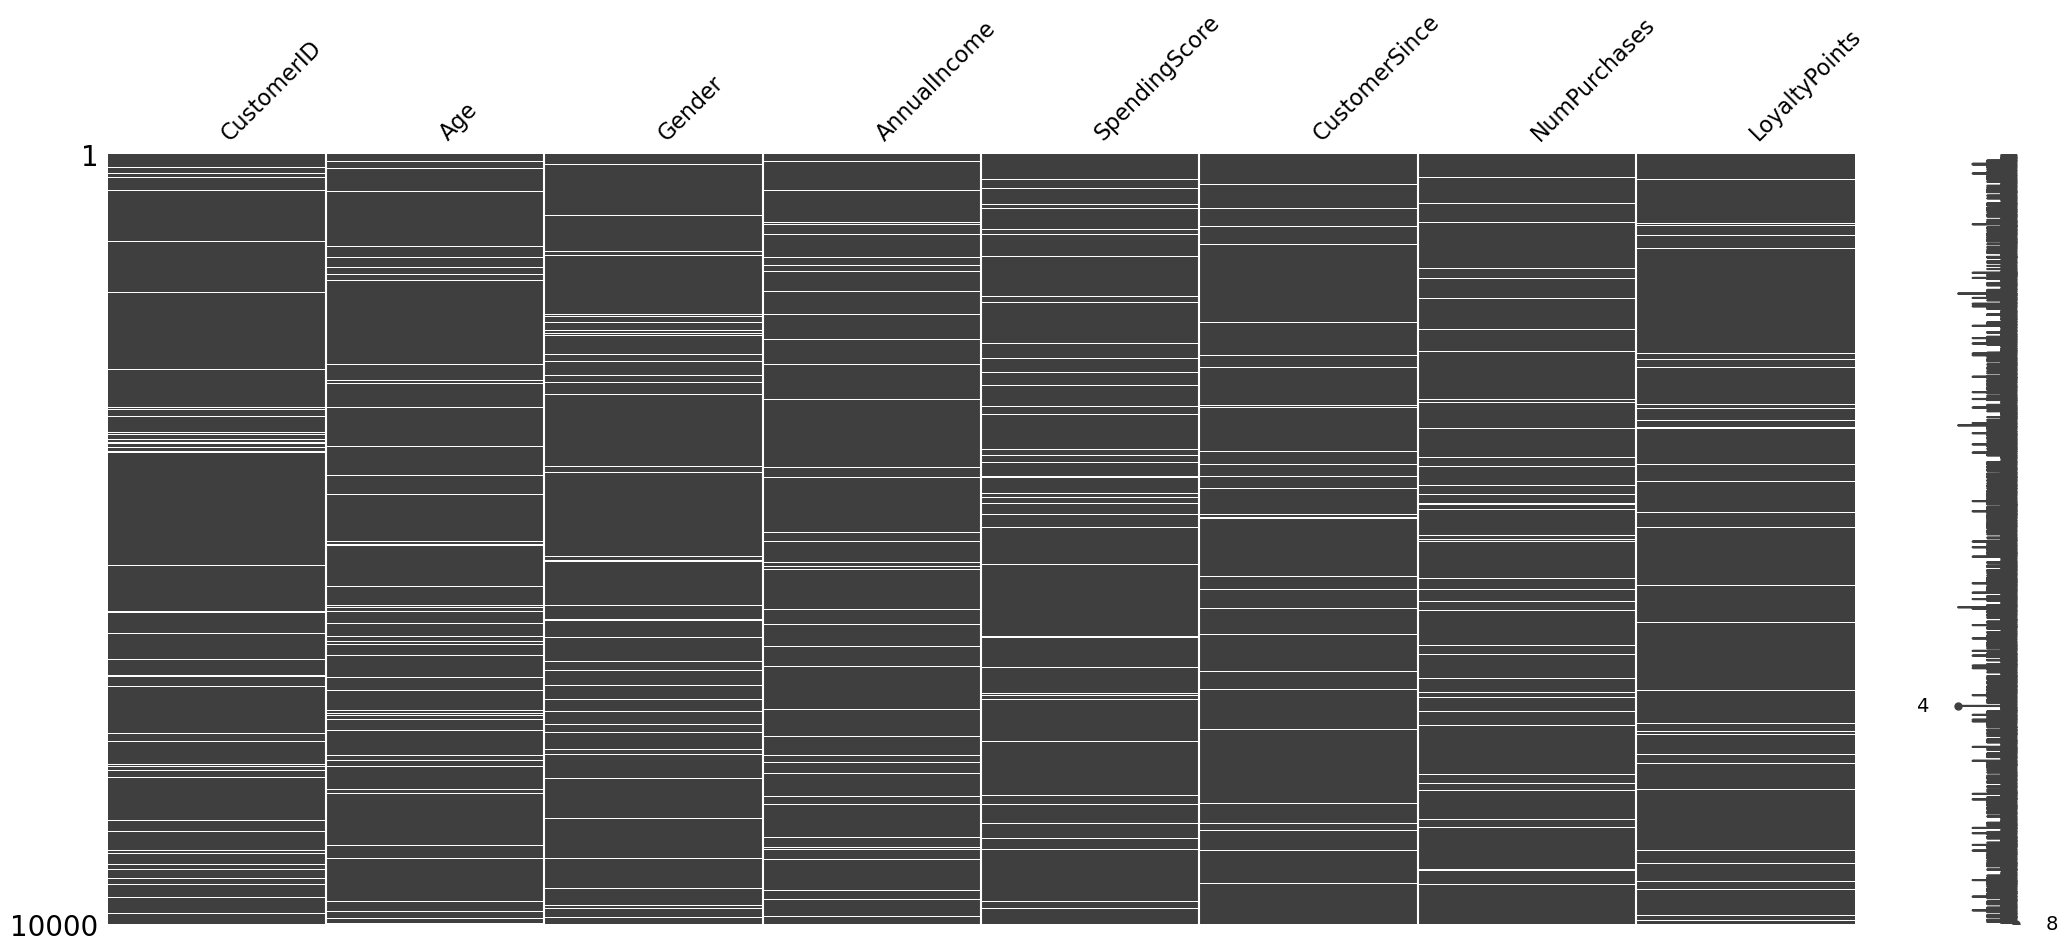

In [6]:
msno.matrix(df)
plt.show()

In [7]:
df.sample(5)

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,CustomerSince,NumPurchases,LoyaltyPoints
6972,6973.0,38.0,Male,95446.0,69.0,2022-04-18,31.0,2455.0
5634,NaN,60.0,Female,60643.0,83.0,2019-01-08,18.0,3611.0
7948,7949.0,34.0,NaN,67492.0,92.0,2019-03-05,77.0,204.0
9505,9506.0,31.0,Male,91637.0,38.0,2021-01-25,38.0,4384.0
7727,7728.0,52.0,Female,115777.0,23.0,2018-12-03,NaN,2128.0


In [8]:
# CustomerID'si eksik olan satırları silelim
df = df.dropna(subset=['CustomerID'])

In [9]:
# Age sütunundaki eksik verileri median (ortanca) ile doldurmak
df['Age'].fillna(df['Age'].median(), inplace=True)


In [10]:
# AnnualIncome sütunundaki eksik verileri median ile doldurmak
df['AnnualIncome'].fillna(df['AnnualIncome'].median(), inplace=True)


In [11]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,NumPurchases,LoyaltyPoints
count,9500.000000,9500.000000,9500.000000,9022.000000,9028.000000,9019.000000
mean,4997.453474,43.503895,67484.103368,49.955331,50.347253,2503.452600
std,2893.455449,14.547572,29904.804824,28.943575,28.534297,1448.306966
min,1.000000,18.000000,15014.000000,1.000000,1.000000,0.000000
25%,2486.750000,32.000000,41654.750000,25.000000,26.000000,1267.000000
50%,4996.500000,43.000000,67285.500000,50.000000,50.000000,2517.000000
75%,7501.250000,56.000000,93340.000000,75.000000,75.000000,3758.000000
max,10000.000000,69.000000,119987.000000,100.000000,99.000000,4999.000000


In [12]:
# LoyaltyPoints sütunundaki eksik verileri median ile doldurmak
df['LoyaltyPoints'].fillna(df['LoyaltyPoints'].median(), inplace=True)


In [13]:
# CustomerSince sütunundaki eksik verileri en yaygın değerle doldurmak
df['CustomerSince'].fillna(df['CustomerSince'].mode()[0], inplace=True)


In [14]:
# Gender sütunundaki eksik verileri en yaygın değer ile doldurmak
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# NumPurchases sütunundaki eksik verileri median ile doldurmak
df['NumPurchases'].fillna(df['NumPurchases'].median(), inplace=True)


In [15]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
AnnualIncome       0
SpendingScore    478
CustomerSince      0
NumPurchases       0
LoyaltyPoints      0
dtype: int64

In [16]:
df.sample(5)

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,CustomerSince,NumPurchases,LoyaltyPoints
6003,6004.0,41.0,Female,103732.0,37.0,2016-11-21,23.0,3331.0
4721,4722.0,53.0,Female,114937.0,75.0,2019-07-23,31.0,148.0
5299,5300.0,36.0,Female,15018.0,48.0,2015-09-17,53.0,198.0
2822,2823.0,39.0,Male,74003.0,89.0,2014-12-18,51.0,4791.0
8830,8831.0,60.0,Female,25556.0,94.0,2019-04-14,57.0,350.0


In [17]:
# SpendingScore sütunundaki eksik verileri median ile doldurmak
df['SpendingScore'].fillna(df['SpendingScore'].median(), inplace=True)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9500 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     9500 non-null   float64
 1   Age            9500 non-null   float64
 2   Gender         9500 non-null   object 
 3   AnnualIncome   9500 non-null   float64
 4   SpendingScore  9500 non-null   float64
 5   CustomerSince  9500 non-null   object 
 6   NumPurchases   9500 non-null   float64
 7   LoyaltyPoints  9500 non-null   float64
dtypes: float64(6), object(2)
memory usage: 668.0+ KB


###Visulation

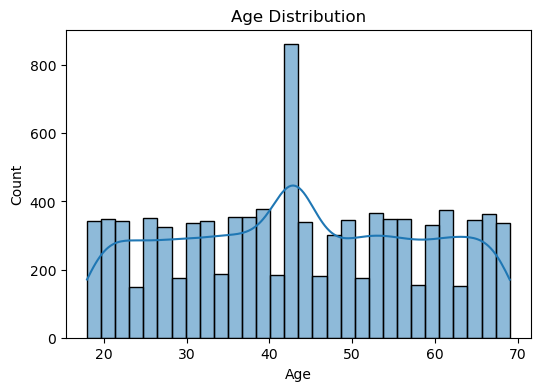

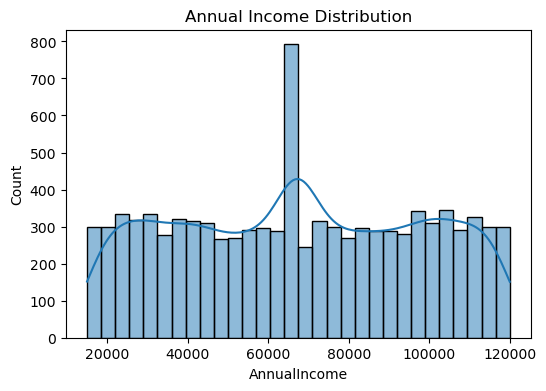

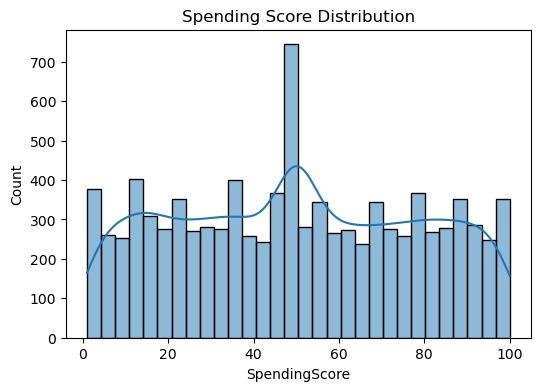

In [19]:
# Yaş dağılımı
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Yıllık Gelir dağılımı
sns.histplot(df['AnnualIncome'], kde=True, bins=30)
plt.title('Annual Income Distribution')
plt.show()

# Harcama Skoru dağılımı
sns.histplot(df['SpendingScore'], kde=True, bins=30)
plt.title('Spending Score Distribution')
plt.show()


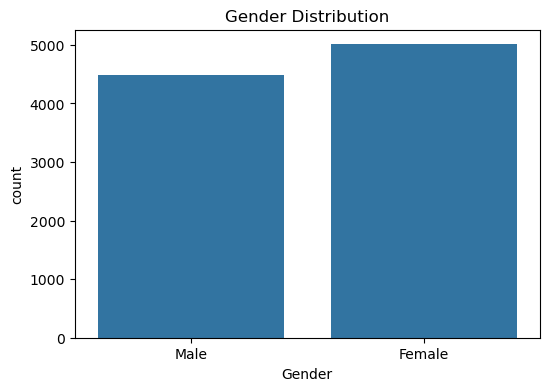

In [20]:
# Cinsiyet dağılımı (Countplot)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


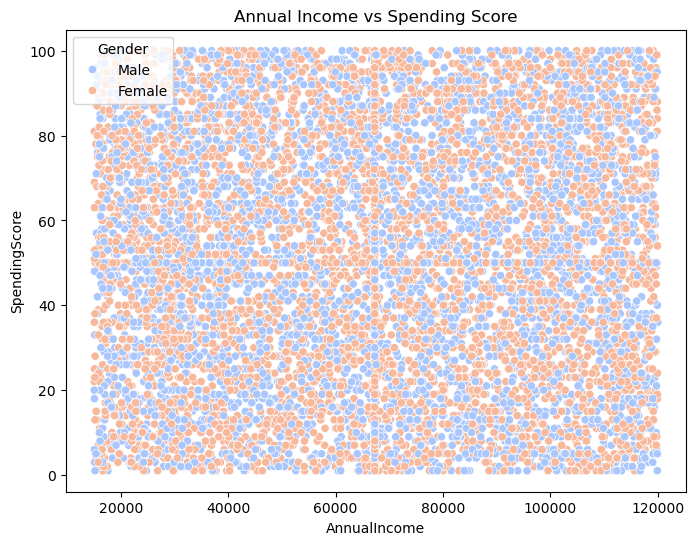

In [21]:
# Yıllık gelir ve harcama skoru arasındaki ilişki
plt.figure(figsize=(8,6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df, hue='Gender', palette='coolwarm')
plt.title('Annual Income vs Spending Score')
plt.show()


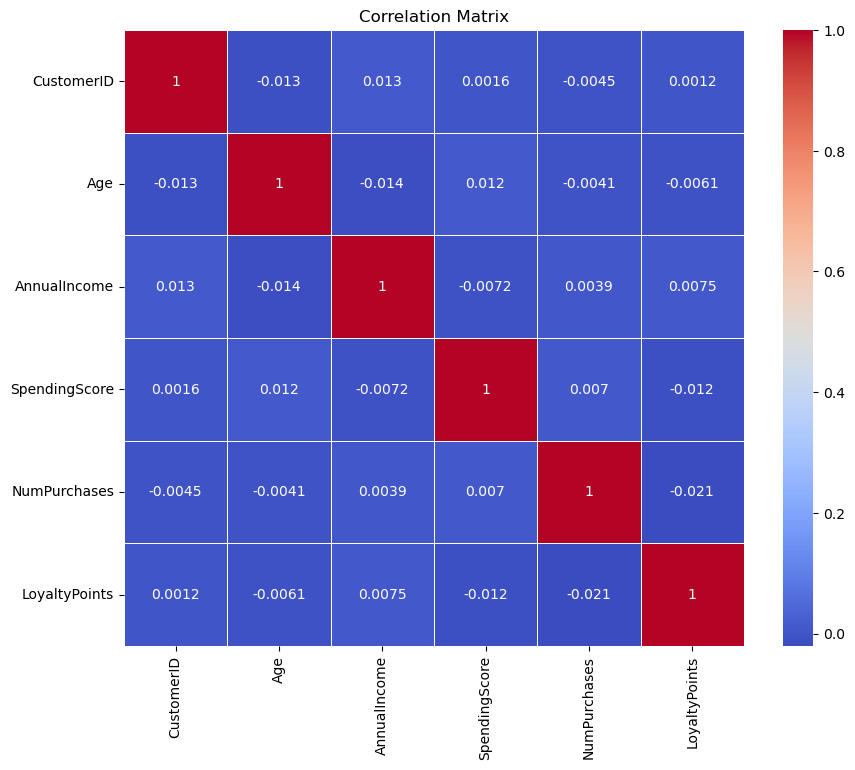

In [22]:
# Sadece sayısal sütunları seçelim
numeric_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisi
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


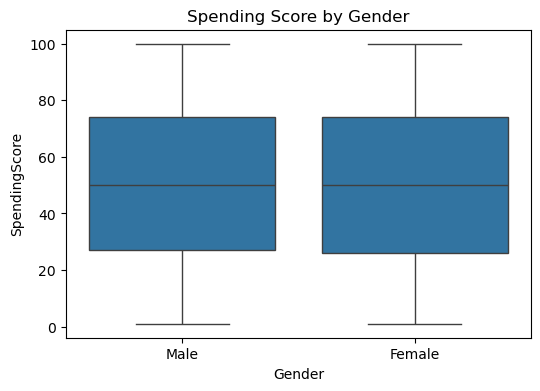

In [23]:
# Cinsiyete göre harcama skoru kutu grafiği
sns.boxplot(x='Gender', y='SpendingScore', data=df)
plt.title('Spending Score by Gender')
plt.show()


# Veri Temizliği ve Görselleştirme

In [24]:

# Veriyi yükleyelim
df = pd.read_csv('customer_data.csv')

# İlk birkaç satıra göz atalım
df.head()

# Eksik verileri kontrol edelim
print(df.isnull().sum())

# CustomerID eksik olan satırları temizleyelim
df = df.dropna(subset=['CustomerID'])

# Sayısal sütunlardaki eksik verileri median ile dolduralım
df['AnnualIncome'].fillna(df['AnnualIncome'].median(), inplace=True)
df['SpendingScore'].fillna(df['SpendingScore'].median(), inplace=True)
df['LoyaltyPoints'].fillna(df['LoyaltyPoints'].median(), inplace=True)

# Tarih sütununu datetime formatına dönüştürelim
df['CustomerSince'] = pd.to_datetime(df['CustomerSince'], errors='coerce')

# Kategorik sütunları düzeltelim
df['Gender'] = df['Gender'].astype('category')

# Son haliyle veri tiplerini kontrol edelim
print(df.info())


CustomerID       500
Age              500
Gender           500
AnnualIncome     500
SpendingScore    500
CustomerSince    500
NumPurchases     500
LoyaltyPoints    500
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9500 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     9500 non-null   float64       
 1   Age            9026 non-null   float64       
 2   Gender         9025 non-null   category      
 3   AnnualIncome   9500 non-null   float64       
 4   SpendingScore  9500 non-null   float64       
 5   CustomerSince  9026 non-null   datetime64[ns]
 6   NumPurchases   9028 non-null   float64       
 7   LoyaltyPoints  9500 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(6)
memory usage: 603.1 KB
None


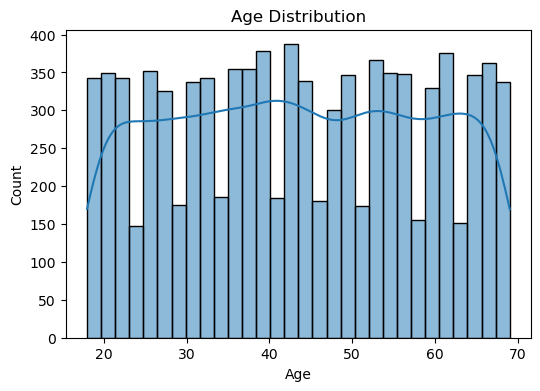

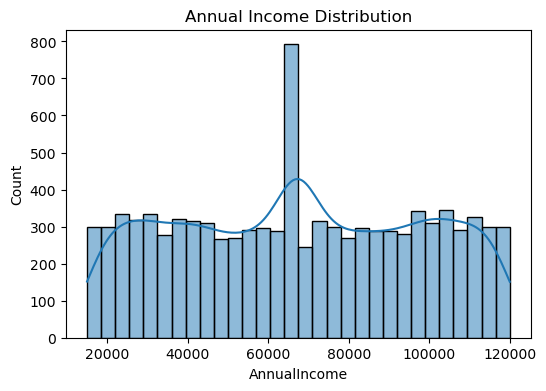

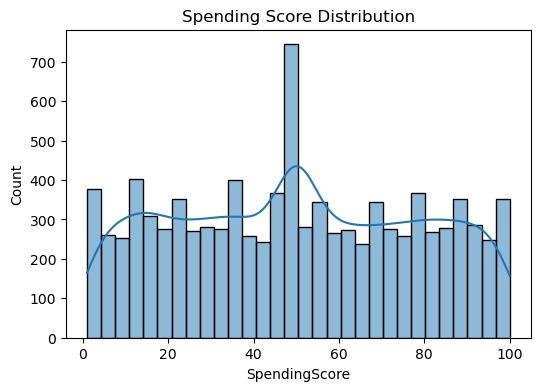

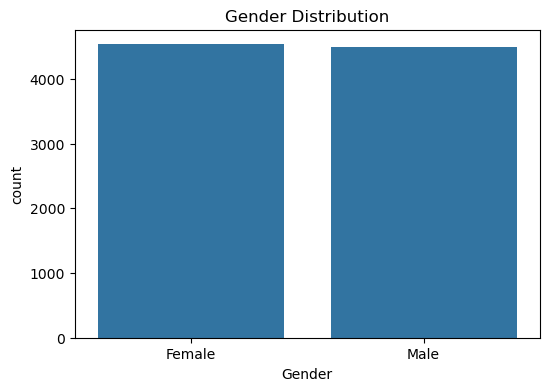

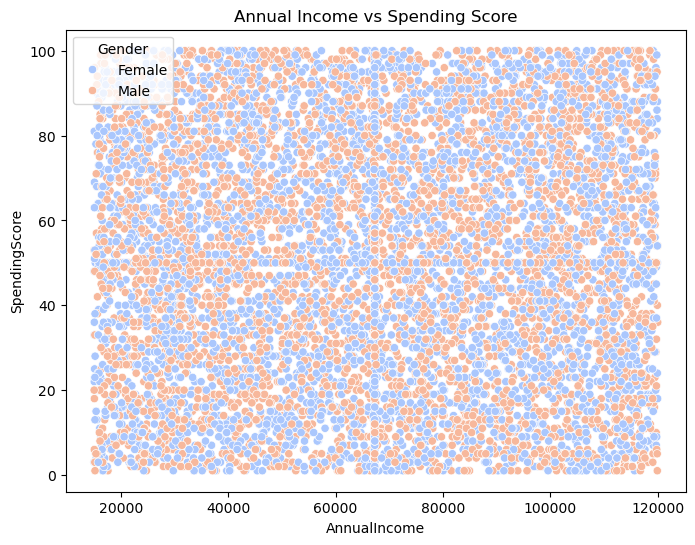

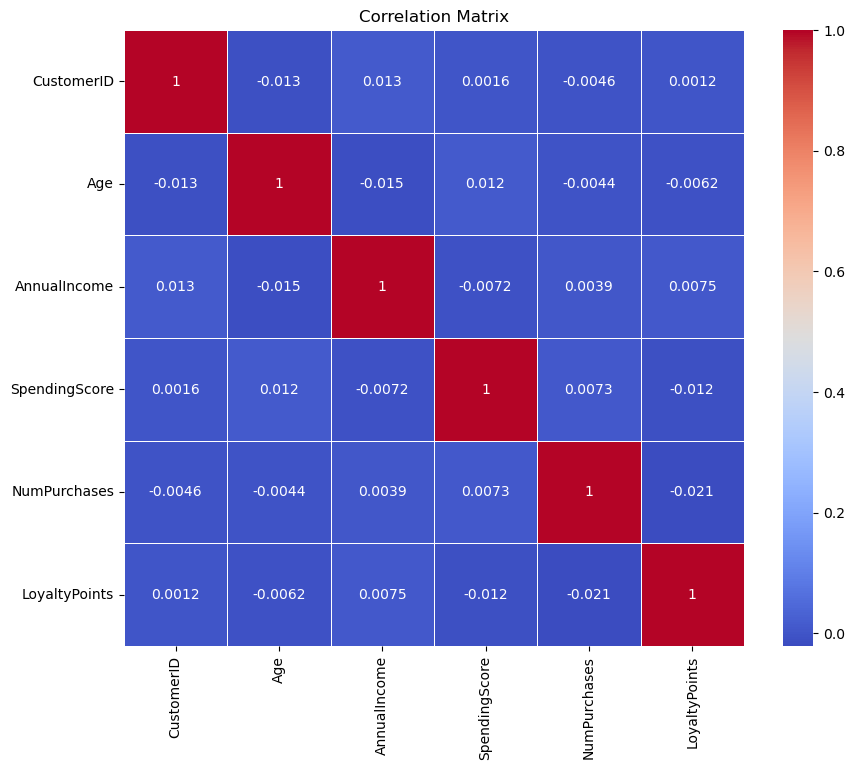

In [25]:

# Yaş dağılımı
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Yıllık Gelir dağılımı
sns.histplot(df['AnnualIncome'], kde=True, bins=30)
plt.title('Annual Income Distribution')
plt.show()

# Harcama Skoru dağılımı
sns.histplot(df['SpendingScore'], kde=True, bins=30)
plt.title('Spending Score Distribution')
plt.show()

# Cinsiyet dağılımı (Countplot)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Yıllık gelir ve harcama skoru arasındaki ilişki
plt.figure(figsize=(8,6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df, hue='Gender', palette='coolwarm')
plt.title('Annual Income vs Spending Score')
plt.show()

# Korelasyon matrisi
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [26]:
from sklearn.cluster import KMeans

# Segmentasyon için sadece sayısal verileri alalım
X = df[['Age', 'AnnualIncome', 'SpendingScore']]

# KMeans modeli - 5 farklı segment oluşturalım
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Her bir müşteri segmentinin kaç kişi içerdiğini görelim
print(df['Cluster'].value_counts())

# Segmentleri görselleştirme
plt.figure(figsize=(8,6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation with KMeans')
plt.show()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values